In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix

In [2]:
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    if tag == 'J':
        return wordnet.ADJ
    elif tag == 'N':
        return wordnet.NOUN
    elif tag == 'V':
        return wordnet.VERB
    elif tag == 'R':
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [3]:
def str_from_ascii(l):
    return "".join([chr(char) for char in l])

In [4]:
cen_f = [102, 117, 99, 107]
cen_n = [110, 105, 103, 103, 97]
cen_b = [98, 105, 116, 99, 104]

In [5]:
regex_patt = [("in' ", "ing "), ("f\*\*\*", str_from_ascii(cen_f)), ("n\*\*\*\*", str_from_ascii(cen_n)), 
              ("b\*\*\*\*", str_from_ascii(cen_b)), ("ggaz ", "ggas "), (" 'til ", " until "),
              (" mother-f", " motherf"), (" c'mon", " come on"), ("wanna", "want to"),
              ("'mma|'ma", " going to")]

def normalize_spelling(lower_case_data):
    for to_replace, replace_with in regex_patt:
        lower_case_data = re.sub(to_replace, replace_with, lower_case_data)   
    return lower_case_data

In [6]:
def text_to_words(text):
    lower_text = text.lower()
    norm_text = normalize_spelling(lower_text)
    letters_only = re.sub("[^a-zA-Z]", " ", norm_text)
    letters_only = " ".join(letters_only.split())
    words = letters_only.split()
    words = [word for word in words if word not in stopwords.words("english")]
    return words

In [7]:
def tokenize_and_stemming(data):
    words = text_to_words(data)
    stem_words = [PorterStemmer().stem(word) for word in words]
    return stem_words

In [8]:
def tokenize_and_lemmatization(data):
    words = text_to_words(data)
    lem_words = [WordNetLemmatizer().lemmatize(word, get_pos(word)) for word in words]
    return lem_words

In [9]:
data = pd.read_csv("Datasets/LyricEmotion.csv")

In [10]:
train, test = train_test_split(data, test_size = 0.2)
y_train = train["Emotion"]
y_test = test["Emotion"]

In [11]:
tf = TfidfVectorizer(tokenizer = tokenize_and_stemming, ngram_range=(1, 2))
tf.fit_transform(data["Lyric"])
train_vect = tf.transform(train["Lyric"])
test_vect = tf.transform(test["Lyric"])

In [12]:
svc = LinearSVC(tol = 1e-05)
classifier = svc.fit(train_vect, y_train)
test_pred = svc.predict(test_vect)

print("Accuracy: ", accuracy_score(y_test, test_pred))

Accuracy:  0.8340192043895748


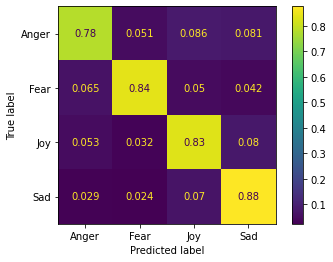

In [13]:

plot_confusion_matrix(classifier, test_vect, y_test, normalize = 'true')


In [14]:
tf2 = TfidfVectorizer(tokenizer = tokenize_and_lemmatization, ngram_range=(1, 2))
tf2.fit_transform(data["Lyric"])
train_vect2 = tf2.transform(train["Lyric"])
test_vect2 = tf2.transform(test["Lyric"])

In [15]:

svc2 = LinearSVC(tol = 1e-05)
classifier2 = svc2.fit(train_vect2, y_train)
test_pred2 = svc2.predict(test_vect2)

print("Accuracy: ",accuracy_score(y_test, test_pred2))


Accuracy:  0.8299039780521262


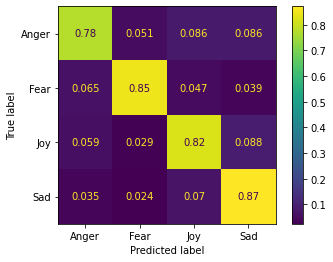

In [16]:

plot_confusion_matrix(classifier2, test_vect2, y_test, normalize = 'true')
